In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
grid_size = 5
initial_state = np.array([0,0])
loc_a = np.array([0,1])
loc_a_ = np.array([4,1])
rew_a = 5
loc_b = np.array([0,3])
loc_b_ = np.array([2,3])
rew_b = 5

In [4]:
def next_state(state, action):
    if state[0] == loc_a[0] and state[1] == loc_a[1]:
                    return loc_a_, rew_a
    elif state[0] == loc_b[0] and state[1] == loc_b[1]:
                    return loc_b_, rew_b
    else:
        if action == 'N':
            if state[0] == 0:
                return state, -1
            else:
                state = state + np.array([-1,0])
                return state, 0
        if action == 'S':
            if state[0] == grid_size - 1:
                return state, -1
            else:
                state = state + np.array([1,0])
                return state, 0
        if action == 'W':
            if state[1] == 0:
                return state, -1
            else:
                state = state + np.array([0,-1])
                return state, 0
        if action == 'E':
            if state[1] == grid_size -1 :
                return state, -1
            else:
                state = state + np.array([0,1])
                return state, 0

In [5]:
def compute_state_val_function(max_iterations, eps, policy):
    val_function = np.zeros((max_iterations, grid_size,grid_size))
    change = np.zeros(max_iterations)
    actions = ['N','S','W','E']
    iteration = 0
    gamma = 0.9
    change[0] = 10
    while iteration <= max_iterations:
        for i in range(grid_size):
            for j in range(grid_size):
                value = 0 
                for action_idx, action in enumerate(actions):
                    astate, arew = next_state(np.array([i,j]), action)
                    value += policy[i,j,action_idx] * (arew + gamma * val_function[iteration,astate[0],astate[1]])
                val_function[iteration+1,i,j] = value
        change[iteration] = abs(np.sum(val_function[iteration]-val_function[iteration+1]))
        if change[iteration] < eps: 
            break
        iteration += 1
    return val_function[:iteration+1,:,:], change[:iteration+1]

In [6]:
def compute_action_val_function(max_iterations, eps, policy):
    
    actions = ['N','S','W','E']
    val_function = np.zeros((max_iterations, grid_size,grid_size, len(actions)))
    change = np.zeros(max_iterations)
    iteration = 0
    gamma = 0.9
    change[0] = 10
    while iteration <= max_iterations:
        for i in range(grid_size):
            for j in range(grid_size):
                for action_index, action in enumerate(actions):
                    astate, arew = next_state(np.array([i,j]),action)
                    value = arew + gamma * policy[i,j,action_index] * np.sum(val_function[iteration,astate[0],astate[1],:])
                    val_function[iteration+1,i,j,action_index] = value
        change[iteration] = abs(np.sum(val_function[iteration]-val_function[iteration+1]))
        if change[iteration] < eps: 
            break
        iteration += 1
    return val_function[:iteration,:,:,:], change[:iteration]

So far, we just copied the algorithms we implemented for Sheet02. Now we want to perform Policy Improvement: 
The initial policy is defined by doing random steps, i.e probability 0.25 for each of the four possible steps. 

Unfortunately, we did not understand the difference between a) und c), so the difference between using the state or the action value functions to improve the policy. 
in the lectures slides, we only found one formulation to update the policy, namely \pi^'(s) = argmax q(a,s). This is what we implmented here. We are not sure if that is now part a) or part c). 



In [ ]:
def policy_improvement(max_policy_improvement_iterations, max_iterations_state, max_iterations_action, epsilon_state, epsilon_action): 
    num_actions = 4
    grid_size = 5
    gamma = 0.9
    actions = ["N", "S", "W", "E"]
    policy = 1/num_actions * np.ones((grid_size, grid_size, num_actions))
    
    state_value, _ = compute_state_val_function(max_iterations_state, epsilon_state, policy)
    state_value = state_value[-1, :, :]
    action_value, _ = compute_action_val_function(max_iterations_action, epsilon_action, policy)
    
    for i in range(max_policy_improvement_iterations): 
        print(i)
        current_policy = np.zeros((grid_size, grid_size, num_actions))

        #Choose new policy as argmax 
        for j in range(grid_size): 
            for k in range(grid_size): 
                values_of_strange_q = np.zeros(num_actions)
                for l in range(num_actions): 
                    new_state, reward_a = next_state(np.array([j,k]), actions[l])
                    values_of_strange_q[l] = reward_a + gamma * state_value[new_state[0], new_state[1]]
                #best_actions = np.where(action_value[-1, j, k, :] == np.max(action_value[-1,j, k, :]))[0]
                best_actions = np.where(values_of_strange_q == np.max(values_of_strange_q))[0] # i.e. argmax but cooler
                current_policy[j,k, best_actions] = 1/len(best_actions)
        
        current_state_value, _ = compute_state_val_function(max_iterations_state, epsilon_state, current_policy)
        current_state_value = current_state_value[-1, :, :]

        if np.all(current_policy == policy): 
            print("terminated because of no policy improvement")
            return current_policy

        policy = current_policy
        state_value = current_state_value
        action_value, _ = compute_action_val_function(max_iterations_action, epsilon_action, policy)

    print("terminated because of max iterations")
    return current_policy             

In [13]:
max_policy_improvement_iterations = 30
max_iterations_state = 100000
max_iterations_action = 100000
epsilon_state = 1e-14
epsilon_action = 1e-14
current_policy = policy_improvement(max_policy_improvement_iterations, max_iterations_state, max_iterations_action, epsilon_state, epsilon_action)
print(current_policy[:, :, 0])

0
1
terminated because of no policy improvement
[[0.   0.25 0.   0.25 0.  ]
 [0.   1.   1.   1.   0.  ]
 [1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.  ]]


In [9]:
print(current_policy[:,:,0])

[[0.   0.25 0.   0.25 0.  ]
 [0.   0.   0.5  1.   0.5 ]
 [0.5  0.5  0.5  1.   0.5 ]
 [0.5  0.5  0.5  1.   0.5 ]
 [0.5  0.5  0.5  1.   0.5 ]]


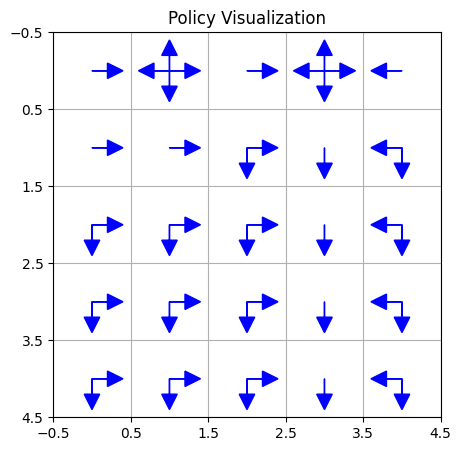

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_policy(policy):
    """
    Visualizes the policy as arrows on a grid.
    
    Parameters:
    policy (numpy.ndarray): A 3D array where:
        - policy[:,:,0] is the probability for 'North' (↑)
        - policy[:,:,1] is the probability for 'South' (↓)
        - policy[:,:,2] is the probability for 'West' (←)
        - policy[:,:,3] is the probability for 'East' (→)
    """
    n_rows, n_cols, n_dirs = policy.shape
    if n_dirs != 4:
        raise ValueError("Policy must have 4 directions in the third dimension (North, South, West, East).")
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(n_cols, n_rows))
    ax.set_xlim(-0.5, n_cols - 0.5)
    ax.set_ylim(-0.5, n_rows - 0.5)
    ax.set_xticks(np.arange(-0.5, n_cols, 1))
    ax.set_yticks(np.arange(-0.5, n_rows, 1))
    ax.grid(True)
    
    # Arrow parameters
    arrow_params = {
        "head_width": 0.2,
        "head_length": 0.2,
        "length_includes_head": True,
        "color": "blue",
    }
    
    # Iterate over each cell
    for i in range(n_rows):
        for j in range(n_cols):
            # Check each direction
            if policy[i, j, 0] > 0:  # North
                ax.arrow(j, i, 0, 0.4, **arrow_params)
            if policy[i, j, 1] > 0:  # South
                ax.arrow(j, i, 0, -0.4, **arrow_params)
            if policy[i, j, 2] > 0:  # West
                ax.arrow(j, i, -0.4, 0, **arrow_params)
            if policy[i, j, 3] > 0:  # East
                ax.arrow(j, i, 0.4, 0, **arrow_params)
    
    # Reverse the y-axis to align with matrix indexing
    ax.invert_yaxis()
    plt.title("Policy Visualization")
    plt.show()

# Beispiel: Dummy Policy erstellen und visualisieren
example_policy = np.zeros((5, 5, 4))
example_policy[1, 1, 0] = 1  # North at (1, 1)
example_policy[2, 2, 1] = 1  # South at (2, 2)
example_policy[3, 3, 2] = 1  # West at (3, 3)
example_policy[4, 4, 3] = 1  # East at (4, 4)

visualize_policy(current_policy)
